# Practice Activity 9.1
## Author: David Greco
### 11/14/24

## The Data

At this link, you will find a dataset containing information about myData disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/myData+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, roc_auc_score, f1_score, roc_curve)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from plotnine import *

warnings.simplefilter("ignore", ConvergenceWarning)
pd.options.mode.chained_assignment = None

In [30]:
myData = pd.read_csv(r"c:\Users\elect\OneDrive\Desktop\ha_1.csv")

myData[["sex", "cp", "restecg"]] = myData[["sex", "cp", "restecg"]].astype("object")

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict myData disease is present?

How high for the doctors to estimate a 90% chance that myData disease is present?

In [51]:
# Create a pipeline that includes Logistic Regression
log_pipeline = Pipeline(
    [("logistic_regression", LogisticRegression(penalty="l2", random_state=1))]  # L2 regularization applied
)

# Define the predictor variables (age and cholesterol) and the response variable (diagnosis)
X = myData[["age", "chol"]]  # Features (predictors)
y = myData["diagnosis"]  # Target variable (response)

# Fit the logistic regression model using the defined pipeline
log_fitted = log_pipeline.fit(X, y)

# Extract the fitted logistic regression model from the pipeline
log_model = log_fitted.named_steps["logistic_regression"]

# Retrieve the coefficients and intercept of the logistic regression model
coefficients = log_model.coef_  # Coefficients for the features
intercept = log_model.intercept_  # Intercept of the model

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0.04686331 0.00180124]]
Intercept: [-3.24011226]


In [32]:
threshold = 0.5
age = 55
beta_0_log = log_model.intercept_[0]
beta_1_log = log_model.coef_[0][0]
beta_2_log = log_model.coef_[0][1]

logit_p_log = np.log(threshold / (1 - threshold)) 
chol = (logit_p_log - beta_0_log - beta_1_log * age) / beta_2_log
chol

367.87488979857886

*How high for the doctors to estimate a 90% chance that myData disease is present?*

In [33]:
threshold = 0.9
age = 55
beta_0 = log_model.intercept_[0]
beta_1 = log_model.coef_[0][0]
beta_2 = log_model.coef_[0][1]

logit_p = np.log(threshold / (1 - threshold)) 
chol = (logit_p - beta_0 - beta_1 * age) / beta_2
chol

1587.715879275397

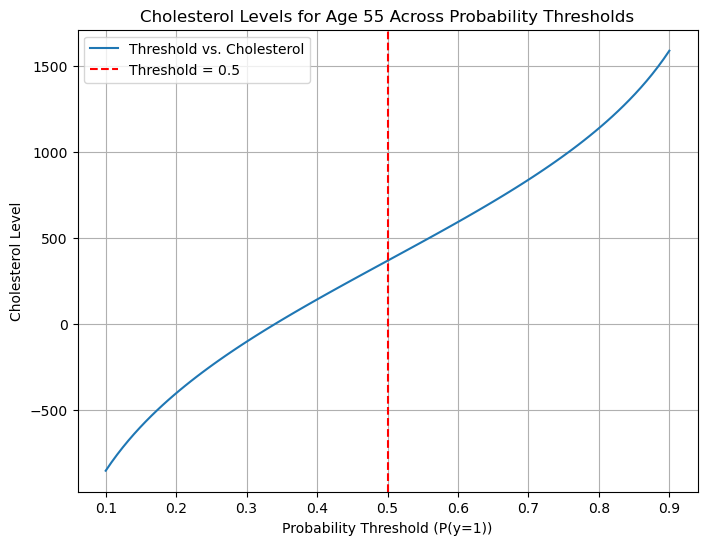

In [39]:
# Set the age of the individual for which cholesterol levels will be calculated
age = 55  

# Create an array of probability thresholds ranging from 0.1 to 0.9
thresholds = np.linspace(0.1, 0.9, 100)

# Calculate the log-odds (logit) for each probability threshold
logit_p = np.log(thresholds / (1 - thresholds))

# Calculate the corresponding cholesterol levels based on the logistic regression coefficients
# beta_0, beta_1, and beta_2 are coefficients from the fitted logistic regression model
cholesterol_levels = (logit_p - beta_0 - beta_1 * age) / beta_2

# Set up the plot for cholesterol levels against probability thresholds
plt.figure(figsize=(8, 6))  # Create a figure with specified size
plt.plot(thresholds, cholesterol_levels, label="Threshold vs. Cholesterol")  # Plot cholesterol levels
plt.axvline(0.5, color="red", linestyle="--", label="Threshold = 0.5")  # Add a vertical line at threshold = 0.5
plt.xlabel("Probability Threshold (P(y=1))")  # Label for the x-axis
plt.ylabel("Cholesterol Level")  # Label for the y-axis
plt.title(f"Cholesterol Levels for Age {age} Across Probability Thresholds")  # Title of the plot
plt.legend()  
plt.grid()  
plt.show() 

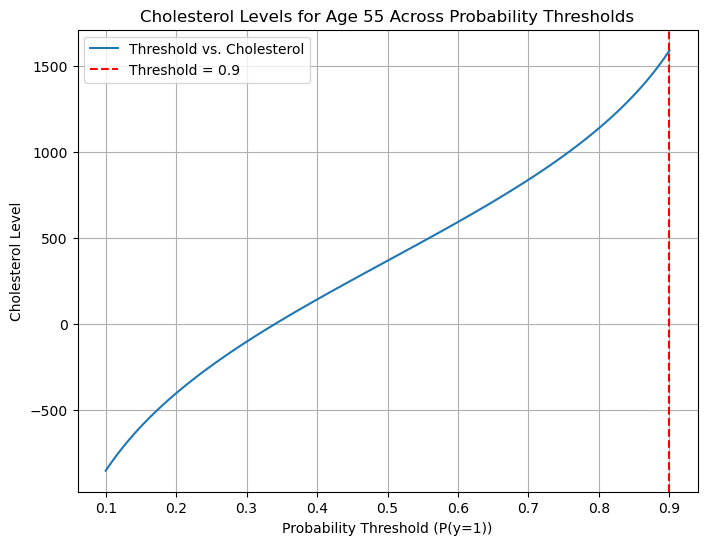

In [35]:

age = 55
thresholds = np.linspace(0.1, 0.9, 100)
logit_p = np.log(thresholds / (1 - thresholds))
cholesterol_levels = (logit_p - beta_0 - beta_1 * age) / beta_2

plt.figure(figsize=(8, 6))
plt.plot(thresholds, cholesterol_levels, label="Threshold vs. Cholesterol")
plt.axvline(0.9, color="red", linestyle="--", label="Threshold = 0.9")
plt.xlabel("Probability Threshold (P(y=1))")
plt.ylabel("Cholesterol Level")
plt.title(f"Cholesterol Levels for Age {age} Across Probability Thresholds")
plt.legend()
plt.grid()
plt.show()

### *Interpretation*

According to the graphs, for a 55-year-old, the cholesterol level must be approx 368 for doctors to predict that heart disease is present.

Additionally, for a 55-year-old, the cholesterol level must be approx 1588 for doctors to estimate a 90% chance that heart disease is present.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict myData disease is present?

In [50]:
# Create a pipeline that includes LDA
lda_pipeline = Pipeline(
    [("lda_regression", LinearDiscriminantAnalysis())]  # Step to perform Linear Discriminant Analysis
)

# Define the predictor variables (age and cholesterol) and the response variable (diagnosis)
X = myData[["age", "chol"]]  # Features
y = myData["diagnosis"]  # Target variable

# Fit the LDA model using the defined pipeline
lda_fitted = lda_pipeline.fit(X, y)

# Extract the fitted LDA model from the pipeline
lda_model = lda_fitted.named_steps["lda_regression"]

# Retrieve the coefficients and intercept of the LDA model
coefficients = lda_model.coef_  # Coefficients for the features
intercept = lda_model.intercept_  # Intercept of the model

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0.04655744 0.00178967]]
Intercept: [-3.21967766]


In [37]:
threshold = 0.5
age = 55
beta_0_lda = lda_model.intercept_[0]
beta_1_lda = lda_model.coef_[0][0]
beta_2_lda = lda_model.coef_[0][1]

logit_p_lda = np.log(threshold / (1 - threshold)) 
chol = (logit_p_lda - beta_0_lda - beta_1_lda * age) / beta_2_lda
chol

368.23535752993814

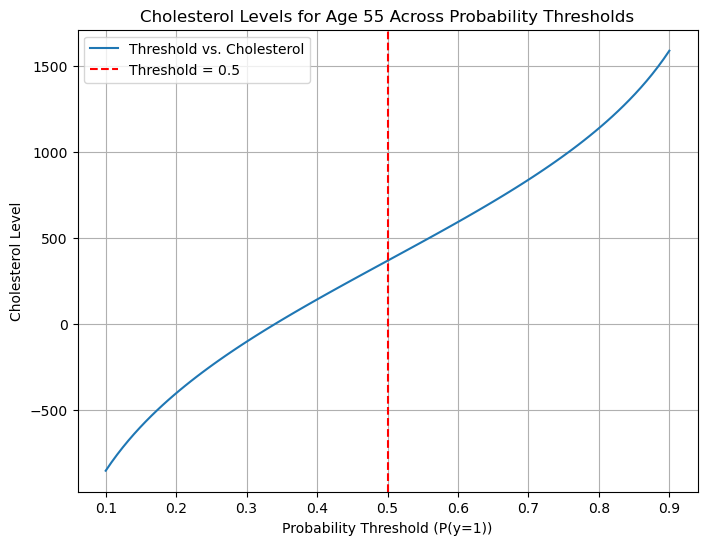

In [38]:

age = 55
thresholds = np.linspace(0.1, 0.9, 100)
logit_p = np.log(thresholds / (1 - thresholds))
cholesterol_levels = (logit_p - beta_0 - beta_1 * age) / beta_2

plt.figure(figsize=(8, 6))
plt.plot(thresholds, cholesterol_levels, label="Threshold vs. Cholesterol")
plt.axvline(0.5, color="red", linestyle="--", label="Threshold = 0.5")
plt.xlabel("Probability Threshold (P(y=1))")
plt.ylabel("Cholesterol Level")
plt.title(f"Cholesterol Levels for Age {age} Across Probability Thresholds")
plt.legend()
plt.grid()
plt.show()

### *Interpretation*


The same as our previous one from #1, according to the graphs, for a 55-year-old, the cholesterol level must be 368 mg/dL for doctors to predict that heart disease is present.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict myData disease is present?

In [ ]:

ct = ColumnTransformer(
    [("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
      make_column_selector(dtype_include=object))],
    remainder="passthrough"
)

# Define the pipeline
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc_regression", SVC(kernel="linear"))
])

# Subset data
X = myData[["age", "chol"]]
y = myData["diagnosis"]

# Define parameter grid
param_grid = {'svc_regression__C': [0.001, 0.01, 0.1, 1, 10]}

# Perform GridSearchCV
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model (entire pipeline)
best_pipeline = grid_search.best_estimator_

# Extract the fitted SVC model
best_svc = best_pipeline.named_steps['svc_regression']

# Access coefficients and intercept (only works for binary classification)
coefs = best_svc.coef_
intercept = best_svc.intercept_

print("Coefficients:", coefs)
print("Intercept:", intercept)


Coefficients: [[0.06439804 0.00366067]]
Intercept: [-4.68655043]


In [27]:
threshold = 0.5
age = 55
beta_0_svc = best_svc.intercept_[0]
beta_1_svc = best_svc.coef_[0][0]
beta_2_svc = best_svc.coef_[0][1]

logit_p_svc = np.log(threshold / (1 - threshold)) 
chol = (logit_p_svc - beta_0_svc - beta_1_svc * age) / beta_2_svc
chol

312.69049436691745

### *Interpretation*

For a 55-year-old, the cholesterol level needs to be approximately 312.69 for doctors to predict that heart disease is present.

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

c:\Users\elect\anaconda3\Lib\site-packages\plotnine\guides\guides.py:207: PlotnineWarning: Cannot generate legend for the 'linetype' aesthetic. Make sure you have mapped a variable to it


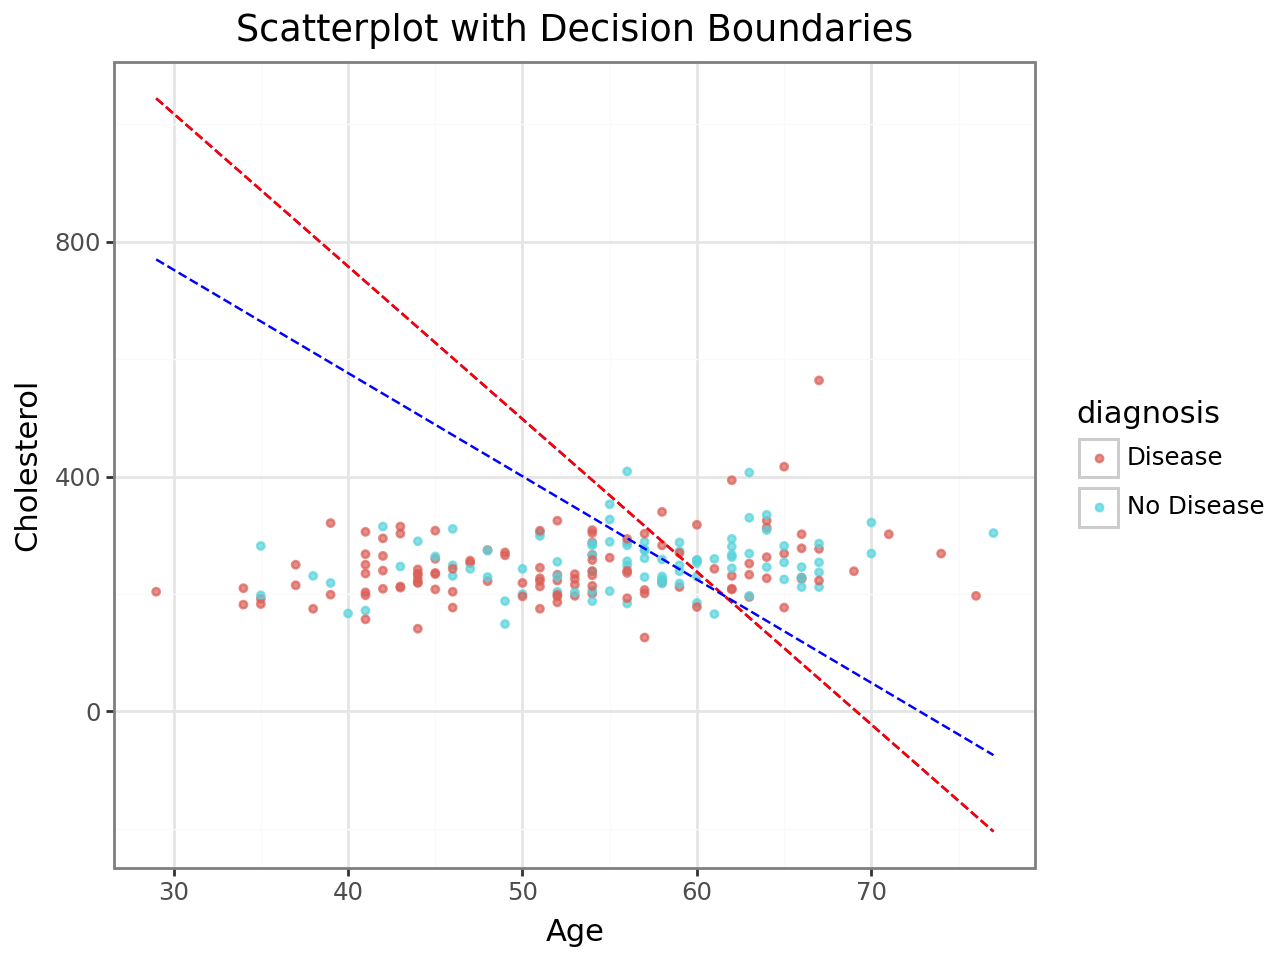

In [49]:

# Create an array of age values ranging from the minimum to the maximum age in myData
x_vals = np.linspace(myData['age'].min(), myData['age'].max(), 204)

# Calculate the corresponding cholesterol levels for each model based on age
y_vals_log = -(beta_0_log + beta_1_log * x_vals) / beta_2_log  # Cholesterol levels for Logistic Regression
y_vals_lda = -(beta_0_lda + beta_1_lda * x_vals) / beta_2_lda    # Cholesterol levels for LDA
y_vals_svc = -(beta_0_svc + beta_1_svc * x_vals) / beta_2_svc    # Cholesterol levels for SVC

# Create a scatter plot with decision boundaries using ggplot
(ggplot(myData, aes(x='age', y='chol', color='diagnosis')) +  # Set aesthetics with age on x-axis and cholesterol on y-axis
    geom_point(alpha=0.7, size=1) +  # Add scatter points for the data with some transparency
    geom_line(aes(x=x_vals, y=y_vals_log), linetype='dashed', color="purple") +  # Add Logistic Regression decision boundary
    geom_line(aes(x=x_vals, y=y_vals_lda), linetype='dashed', color="red") +  # Add LDA decision boundary
    geom_line(aes(x=x_vals, y=y_vals_svc), linetype='dashed', color="blue") +  # Add SVC decision boundary
    labs(x="Age", y="Cholesterol", title="Scatterplot with Decision Boundaries") +  # Label axes and title
    scale_linetype_manual(values={'Logistic Regression': 'solid', 'LDA': 'dashed', 'SVC': 'dotted'}) +  # Set custom line types
    theme_bw()  # Use a clean black-and-white theme
)